# Eigenfaces and simple recognition 

Below libraries/packages were used for both PCA and ISOMAP problems:

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import axes
from PIL import Image as im
from skimage.measure import block_reduce 
import math
import scipy.io as spio
import scipy.sparse.linalg as ll
import scipy.io as sio
from scipy import linalg
from scipy.spatial.distance import cdist
from scipy.spatial import distance_matrix
from sklearn.utils.graph import graph_shortest_path
from sklearn.neighbors import radius_neighbors_graph
import matplotlib.image as mpimg
import networkx as nx


We begin by loading our data, reducing it's resolution, and storing all images in a matrix to later analyze.

Text(0.5, 1.0, 'Mean Face - Subject 1')

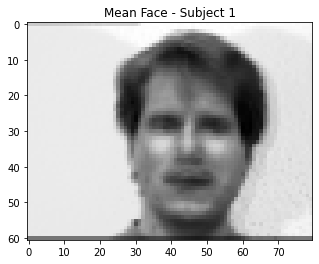

In [3]:
path= os.sys.path

faceMatrix = [] #Empty list to store our vectorized images

for i in range(len(os.listdir())):
    if os.listdir()[i] not in ['.ipynb_checkpoints', 'subject01-test.gif', 'Untitled.ipynb',"Control", "2nd try.ipynb", 
                              "isomap.mat", "isomap.dat","Eigen-Facial Recognition and ISOMAP Ordering.ipynb"] and "subject02" not in os.listdir()[i]:
        img = im.open(os.sys.path[0] + "\\" + os.listdir()[i])
        img_arr = np.array(img)
        img_arr2 = block_reduce(img_arr, block_size = (4,4)).flatten() #Resolution occurring here.
        faceMatrix.append(img_arr2) #Adding iterated vectorized image to the empty lisT.
faces_matrix = np.vstack(faceMatrix) #Transforming our list into a matrix!

mean_face = np.mean(faces_matrix, axis = 0) #Taking the mean of all of the vectorized images to later use to calculate
                                            # the covariance matrix (this is essentially our mu)
plt.imshow(mean_face.reshape(61,80), cmap="gray")#Looks look at the mug
plt.title("Mean Face - Subject 1")

Up to this point, we have calculated and visualized the following:

<img src="Control/mu.png">

With mu on hand, we can now proceed with calculating the covariance matrix:

In [68]:
'''
PCA code derived from sample code provided in module four. Code was repurposed and tweak to come up with solution.
'''

m1 = faces_matrix.shape[0] #grabbing the number of data points to apply the mean in our covariance equation.

xc1 = faces_matrix - mean_face #Normalizing our data points by the mean

C1 = np.dot(xc1, xc1.T)/m1 #Putting it all together to derive to our covariance matrix

The above code block essentially performed (circled portion is mu, highlighted portion is xc1) :

<img src="Control/C Matrix.png">

By taking the eigenpairs (ie. eigenvalues alongside their eigenvectors) from C, we then move on to computing the desired principal components. Ultimately, the next code block will perform these steps in the algorithm:

<img src="Control/eigenpairs.png">

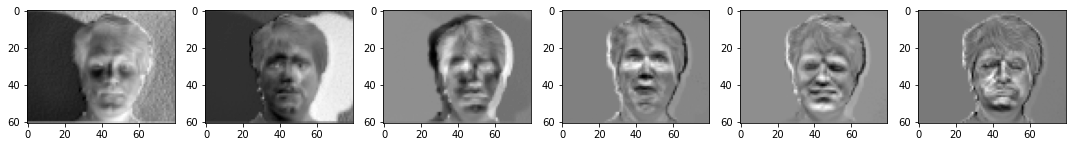

In [67]:
'''
PCA code derived from sample code provided in module four. Code was repurposed and tweak to come up with solution.
'''

K = 6 #Stipulating the number of eigenpairs, and ultimately principal components, to conduct PCA on

S, W = ll.eigs(C1, k = K) #retrieving eigenpairs (THIS TIES TO STEP 2, PER ABOVE)
S1 = S.real #removing any imaginary components from our eigenvalues (THIS TIES TO STEP 2, PER ABOVE)
W1 = W.real #removing any immaginary components from our eigenvectors (THIS TIES TO STEP 2, PER ABOVE)

dim1_1 = np.dot(W1[:,0].T, xc1)/math.sqrt(S1[0]) #Calculating 1st principal component PER STEP 3, ABOVE
dim2_1 = np.dot(W1[:,1].T, xc1)/math.sqrt(S1[1]) #Calculating 2nd principal component PER STEP 3, ABOVE
dim3_1 = np.dot(W1[:,2].T, xc1)/math.sqrt(S1[2]) #Calculating 3rd principal component PER STEP 3, ABOVE
dim4_1 = np.dot(W1[:,3].T, xc1)/math.sqrt(S1[3]) #Calculating 4th principal component PER STEP 3, ABOVE
dim5_1 = np.dot(W1[:,4].T, xc1)/math.sqrt(S1[4]) #Calculating 5th principal component PER STEP 3, ABOVE
dim6_1 = np.dot(W1[:,5].T, xc1)/math.sqrt(S1[5]) #Calculating 6th principal component PER STEP 3, ABOVE
PCMatrix = np.stack([dim1_1,dim2_1,dim3_1,dim4_1,dim5_1,dim6_1]) #Stacking all PCs in order to better visualize:

plt.rcParams["figure.figsize"] = [15.00, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.subplot(1,6,1)
plt.imshow(dim1_1.reshape(61,80), cmap = "gray")
plt.subplot(1,6,2)
plt.imshow(dim2_1.reshape(61,80), cmap = "gray")
plt.subplot(1,6,3)
plt.imshow(dim3_1.reshape(61,80), cmap = "gray")
plt.subplot(1,6,4)
plt.imshow(dim4_1.reshape(61,80), cmap = "gray")
plt.subplot(1,6,5)
plt.imshow(dim5_1.reshape(61,80), cmap = "gray")
plt.subplot(1,6,6)
plt.imshow(dim6_1.reshape(61,80), cmap = "gray")

Above images are the first six "eigenfaces" for subject 1. Each eigenface depicts the subject's features in order of captured variance from left to right (aka, leftmost captures most feature information whilst the rightmost contains the least).

We now repeat the same steps as above but for our second subject:

Text(0.5, 1.0, 'Mean Face - Subject2')

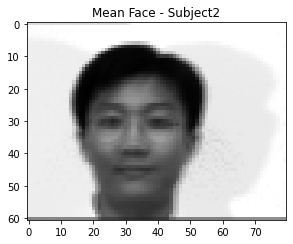

In [17]:
faceMatrix2 = []

for i in range(len(os.listdir())):
    if os.listdir()[i] not in ['.ipynb_checkpoints', 'subject02-test.gif', 'Untitled.ipynb',"Control", "2nd try.ipynb",
                              "isomap.mat", "isomap.dat","Eigen-Facial Recognition and ISOMAP Ordering.ipynb"] and "subject01" not in os.listdir()[i]:
        img = im.open(os.sys.path[0] + "\\" + os.listdir()[i])
        img_arr = np.array(img)
        img_arr2 = block_reduce(img_arr, block_size = (4,4)).flatten()
        faceMatrix2.append(img_arr2)
faces_matrix2 = np.vstack(faceMatrix2)

mean_face2 = np.mean(faces_matrix2, axis = 0)
plt.imshow(mean_face2.reshape(61,80), cmap = "gray")
plt.title("Mean Face - Subject2")

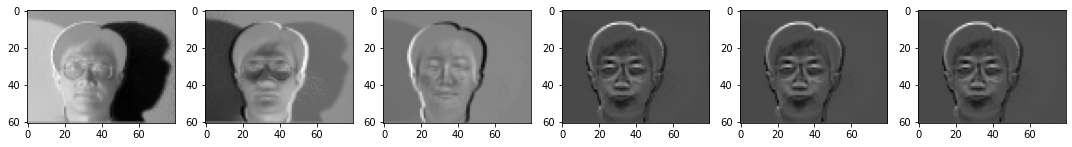

In [19]:
m2 = faces_matrix2.shape[0]

xc2 = faces_matrix2 - mean_face2

C2 = np.dot(xc2, xc2.T)/m2

S, W = ll.eigs(C2, k = K)
S2 = S.real
W2 = W.real

dim1_2 = np.dot(W2[:,0].T, xc2)/math.sqrt(S2[0])
dim2_2 = np.dot(W2[:,1].T, xc2)/math.sqrt(S2[1])
dim3_2 = np.dot(W2[:,2].T, xc2)/math.sqrt(S2[2])
dim4_2 = np.dot(W2[:,3].T, xc2)/math.sqrt(S2[3])
dim5_2 = np.dot(W2[:,3].T, xc2)/math.sqrt(S2[3])
dim6_2 = np.dot(W2[:,3].T, xc2)/math.sqrt(S2[3])

plt.rcParams["figure.figsize"] = [15.00, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.subplot(1,6,1)
plt.imshow(dim1_2.reshape(61,80), cmap = "gray")
plt.subplot(1,6,2)
plt.imshow(dim2_2.reshape(61,80), cmap = "gray")
plt.subplot(1,6,3)
plt.imshow(dim3_2.reshape(61,80), cmap = "gray")
plt.subplot(1,6,4)
plt.imshow(dim4_2.reshape(61,80), cmap = "gray")
plt.subplot(1,6,5)
plt.imshow(dim5_2.reshape(61,80), cmap = "gray")
plt.subplot(1,6,6)
plt.imshow(dim6_2.reshape(61,80), cmap = "gray")

Equipped with our eigenfaces, we can now attempt a light version of a facial recognition algorithm using PCA. Let's first load our test images of our two aforementioned subjects and take a peek:

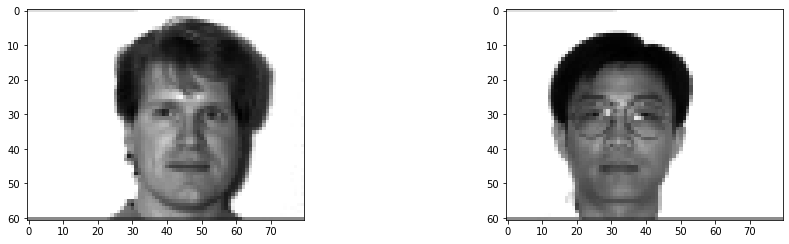

In [21]:
imgTest = im.open(os.sys.path[0] + "\\subject01-test.gif" )
img_arr_test = np.array(imgTest)
img_arr2_test = block_reduce(img_arr_test, block_size = (4,4)).flatten() #Reducing image resulution

imgTest2 = im.open(os.sys.path[0] + "\\subject02-test.gif" )
img_arr_test2 = np.array(imgTest2)
img_arr2_test2 = block_reduce(img_arr_test2, block_size = (4,4)).flatten() #Reducing image resolution

#Below code is to visualize our subjects
plt.rcParams["figure.figsize"] = [15.00, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.subplot(1,2,1)
plt.imshow(img_arr2_test.reshape(61,80), cmap = "gray")
plt.subplot(1,2,2)
plt.imshow(img_arr2_test2.reshape(61,80), cmap = "gray")

We will implement our crude facial recognition algorithm via projection residuals. I will begin by centering the test images of our subjeects by substracting their respective mean faces, and proceed to compute their projection residual scores:

<img src="Control/projectionResiduals.png">

In [70]:
img_arr2_test_norm = img_arr2_test - mean_face #normalizing test image of subject 1
img_arr2_test2_norm = img_arr2_test2 - mean_face2 #normalizing test image of subject 2

j2 = img_arr2_test2_norm #test
j1 = img_arr2_test_norm #test
i1 = dim1_1 #eigen face
i2 = dim1_2 #eigene face

#Applying the projection residual procedure to our vectors
s11 = np.linalg.norm(j1 - np.dot(i1,np.dot(i1.T,j1)), ord = 2)**2 
s21 = np.linalg.norm(j1 - np.dot(i2,np.dot(i2.T,j1)), ord = 2)**2
s12 = np.linalg.norm(j2 - np.dot(i1,np.dot(i1.T,j2)), ord = 2)**2 
s22 = np.linalg.norm(j2 - np.dot(i2,np.dot(i2.T,j2)), ord = 2)**2

#Printing results (comparing eigenfaces against test images)
print("Residual Projection for S11 (eigenface01 against test01): " + str(int(s11)))
print("Residual Projection for S12: (eigenface01 against test02): " + str(int(s12)))
print("Residual Projection for S21: (eigenface02 against test01): " + str(int(s21)))
print("Residual Projection for S22: (eigenface02 against test02): " + str(int(s22)))

Residual Projection for S11 (eigenface01 against test01): 4320838072
Residual Projection for S12: (eigenface01 against test02): 6794706960
Residual Projection for S21: (eigenface02 against test01): 18452173849
Residual Projection for S22: (eigenface02 against test02): 15307882795


As we would hope for: the projection residual scores for the test image and principal component belonging to the same subject are lower than when applied via a mismatched fashion (ie. score for S11, S22, are lower than S12, S22, respectively. 

# Order of faces using ISOMAP

Having loaded our libraries at the top of workbook, let's dive right in loading our data and beginning our ISOMAP analysis:

C:\Users\ALEJA\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


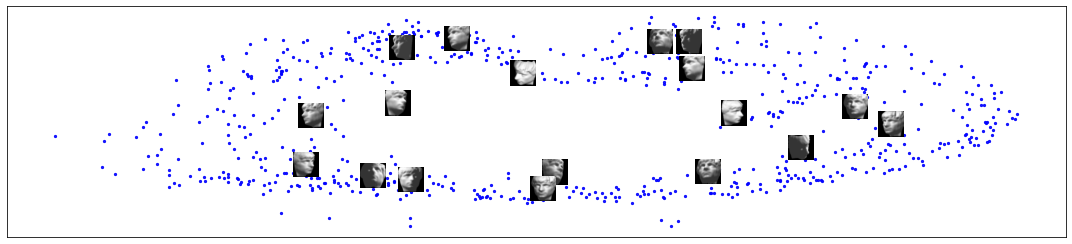

In [64]:
#Loading data:
matFile = sio.loadmat('isomap.mat')
data = matFile['images']

n,m = data.shape


A = radius_neighbors_graph(data.T,radius = 386, p = 2, include_self = False, mode = 'distance') #Creating adjacency via 
#weighted nearest neighbor graph, assuming euclidean distance (by setting p = 2)
G = nx.from_numpy_matrix(A.toarray()) #Necessary for graphin our network

pos = nx.spring_layout(G) #to store our points to later help us embed faces in our graph
nx.draw_networkx(G, pos, node_size =5,   width = .9,edge_color = "white", alpha = .9,
                 node_color = "blue",with_labels = False) #Where the visual magic happens


'''

Below code is to assist in visualizing. In large part, stack-overflow provided the insights needed to come up with 
the below implementation.

Reference: https://stackoverflow.com/questions/56873621/how-to-display-image-icons-on-nodes-in-networkx

''' 
ax  = plt.gca()
fig = plt.gcf()

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform
imsize = 0.1

for n in list(G.nodes()):
    (x,y) = pos[n]
    xx,yy = trans((x,y))
    xa, ya = trans2((xx,yy))
    if n % 40 ==0:
        a = plt.axes([xa-imsize/2.0, ya-imsize/2.0, imsize, imsize])
        a.imshow(data.T[n].reshape(64,64,order = "F"), cmap = "gray")
        a.set_aspect("equal")
        a.axis("off")
        
    plt.show

Above image depicts our adjacency matrix (aka A) and is equivalent to the following steps in our ISOMAP algorithm:

<img src="Control/NN2.png">

<img src="Control/NN.png">

The ensuing code lays out the remaining steps to implement ISOMAP. Please note the annotations in cell block which ties code to the below:

<img src="Control/ISOMAP.png">

Text(0.5, 0, 'Right-Left Pose')

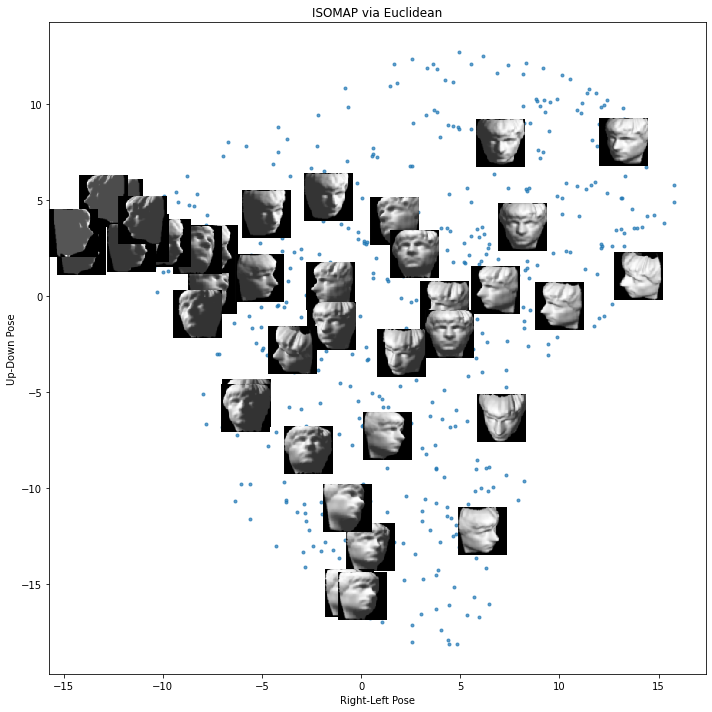

In [65]:
A2 = A.toarray() 
D = graph_shortest_path(A2) #Creating D, per step 2
D2 = D**2 #Necessary for computing the C matrix, later
m = len(D) #Necessary for computing the centering matrix (H), later

H = np.eye(m) - ((1/m) *np.ones((m,m))) #Deriving H, per step2
C = -1/(2) * (np.dot(np.dot(H,D2),H)) #Bringing it all together to compute C, per step 3

evals, evecs = linalg.eig(C) #Computing our eigenpairs, necessary for step 4

idx = evals.argsort()[::-1] #storing the indexes of our descending ordered eigen values 

evals = evals[idx][:2] #initializing variable with our two largest eigenvalues
evecs = evecs[:,idx][:,:2] #initializing variable the two eigenvectors corrsponding to our two largest eigenvalues.

Z = np.dot(evecs,np.diag(evals**(.5))) #implementing step 4
Z = Z.real #Removing any imaginary components.

'''

Below code is to assist in visualizing. In large part, online resources provided the insights needed to come up with 
the below implementation.

Reference: https://benalexkeen.com/isomap-for-dimensionality-reduction-in-python/

''' 

components = Z
x = data

n, m = x.shape
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title("ISOMAP via Euclidean")
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(components[:, 0]) - min(components[:, 0])) * 0.08
y_size = (max(components[:, 1]) - min(components[:, 1])) * 0.08

for i in range(40):
    img_num = np.random.randint(0, m)
    x0 = components[img_num, 0] - (x_size / 2.)
    y0 = components[img_num, 1] - (y_size / 2.)
    x1 = components[img_num, 0] + (x_size / 2.)
    y1 = components[img_num, 1] + (y_size / 2.)
    img = x[:, img_num].reshape(64, 64).T
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(components[:, 0], components[:, 1], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

Now that we have a working algorithm, let's see how ISOMAP performs when implementing ISOMAP with an adjacency matrix based on "manhattan distance" for its weighted nearest neighbors procedure:

Text(0.5, 0, 'Right-Left Pose')

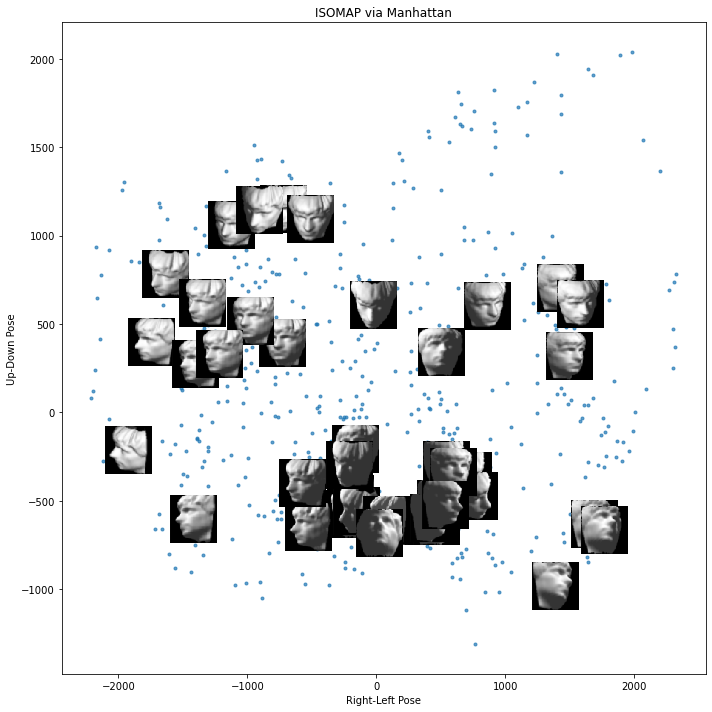

In [66]:
matFile = sio.loadmat('isomap.mat')
data = matFile['images']

n,m = data.shape

#stipulating l1 norm by setting p = 1
A_Man = radius_neighbors_graph(data.T,radius = 386, p = 1, include_self = False, mode = 'distance') 

A2 = A_Man.toarray()
D = graph_shortest_path(A2)
D2 = D**2
m = len(D)

H = np.eye(m) - ((1/m) *np.ones((m,m)))
C = -1/(2) * (np.dot(np.dot(H,D2),H))

evals, evecs = linalg.eig(C)

idx = evals.argsort()[::-1]

evals = evals[idx][:2]
evecs = evecs[:,idx][:,:2]


Z = np.dot(evecs,np.diag(evals**(.5)))
Z = Z.real

components = Z
x = data

n, m = x.shape
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title("ISOMAP via Manhattan")
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(components[:, 0]) - min(components[:, 0])) * 0.08
y_size = (max(components[:, 1]) - min(components[:, 1])) * 0.08

for i in range(40):
    img_num = np.random.randint(0, m)
    x0 = components[img_num, 0] - (x_size / 2.)
    y0 = components[img_num, 1] - (y_size / 2.)
    x1 = components[img_num, 0] + (x_size / 2.)
    y1 = components[img_num, 1] + (y_size / 2.)
    img = x[:, img_num].reshape(64, 64).T
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(components[:, 0], components[:, 1], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

Finally, the below PCA implementation and depiction of our dimensionally reduced data provides insight as to the differences between ISOMAP and PCA:

Text(0.5, 0, 'Right-Left Pose')

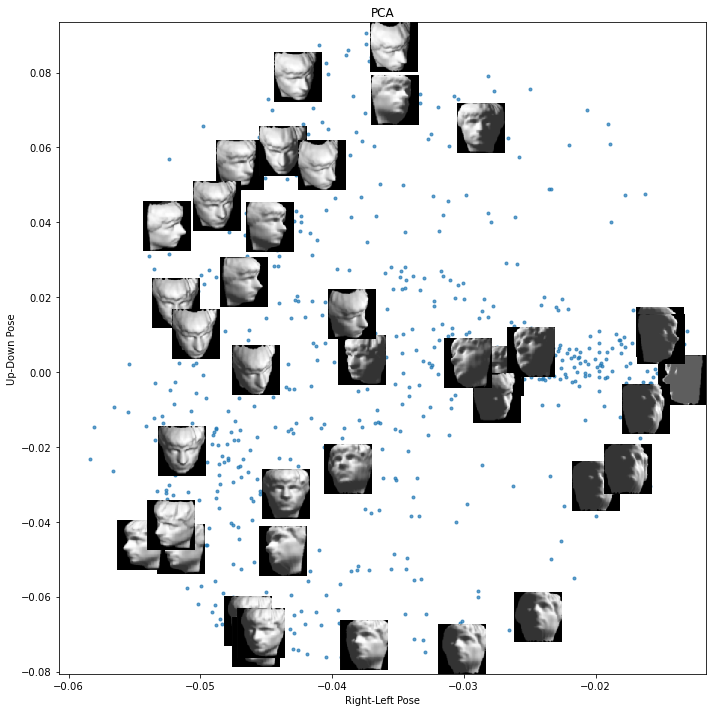

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components =2) #Calculating PCA via sklearn's module.

z = pca.fit(data) #Calculating PCA via sklearn's module

'''

Below code is to assist in visualizing. In large part, online resources provided the insights needed to come up with 
the below implementation.

Reference: https://benalexkeen.com/isomap-for-dimensionality-reduction-in-python/

''' 

components = z.components_.T
x = data

n, m = x.shape
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title("PCA")
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(components[:, 0]) - min(components[:, 0])) * 0.08
y_size = (max(components[:, 1]) - min(components[:, 1])) * 0.08

for i in range(40):
    img_num = np.random.randint(0, m)
    x0 = components[img_num, 0] - (x_size / 2.)
    y0 = components[img_num, 1] - (y_size / 2.)
    x1 = components[img_num, 0] + (x_size / 2.)
    y1 = components[img_num, 1] + (y_size / 2.)
    img = x[:, img_num].reshape(64, 64).T
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(components[:, 0], components[:, 1], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')
